<a href="https://colab.research.google.com/github/arsyandairza/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Nama : Arsyanda Irza Rabbani Yuardhino
# NIM  : 2141720245
# Kelas: TI - 3F

### Contoh

In [5]:
# Import Library

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

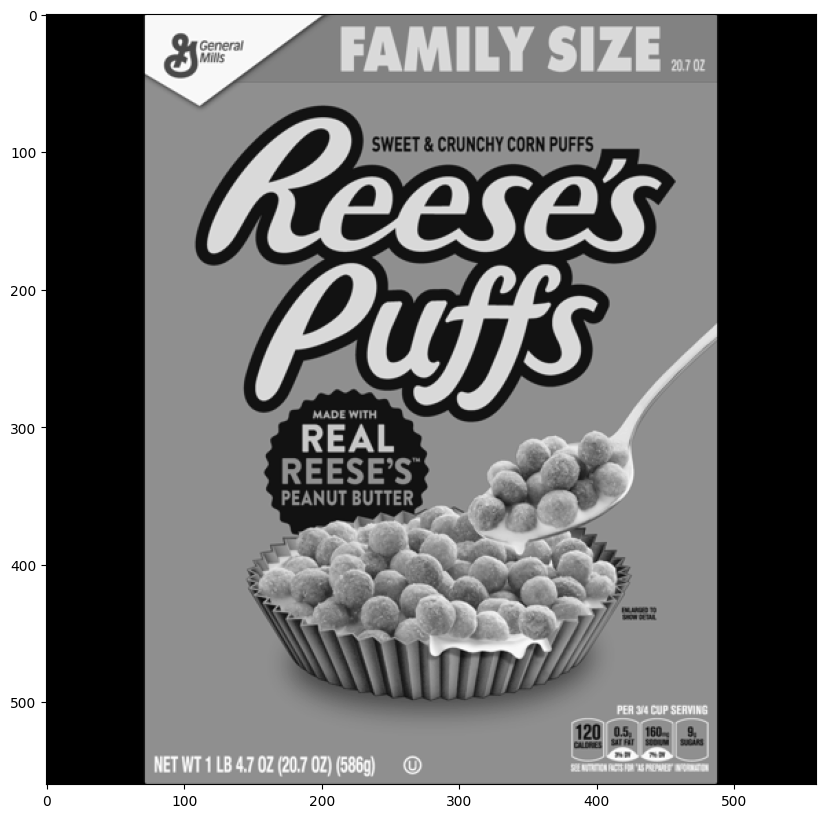

In [8]:
def display (img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
reeses = cv.imread('/content/drive/MyDrive/PCVK/reeses_puffs.png',0)
display(reeses)

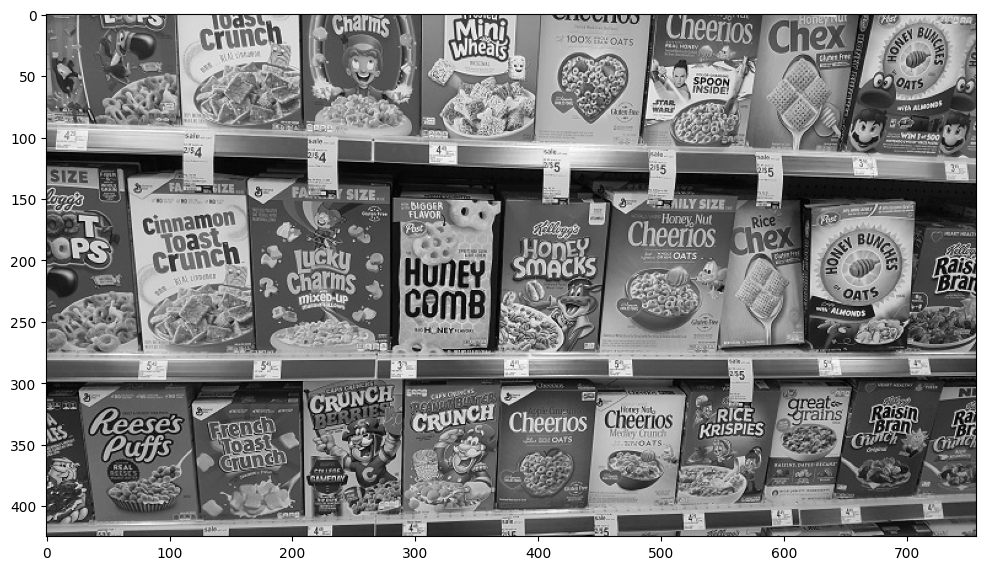

In [9]:
cereals = cv. imread('/content/drive/MyDrive/PCVK/many_cereals.jpg',0)
display(cereals)

In [10]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute (reeses, None)
kp2,des2 = orb.detectAndCompute (cereals ,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches [0]
single_match.distance

71.0

In [11]:
len(matches)

139

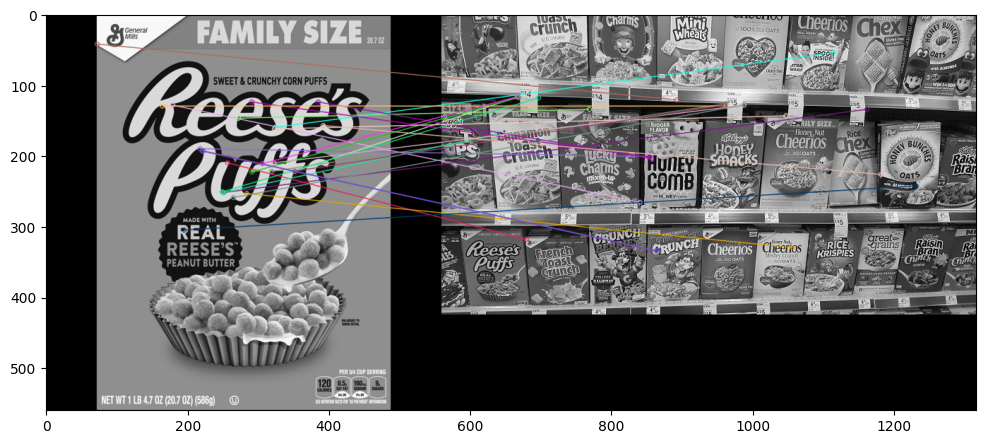

In [12]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

## Contoh 2

In [1]:
!pip install opencv-contrib-python==4.8.1.78

In [18]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [19]:
len(matches)

1501

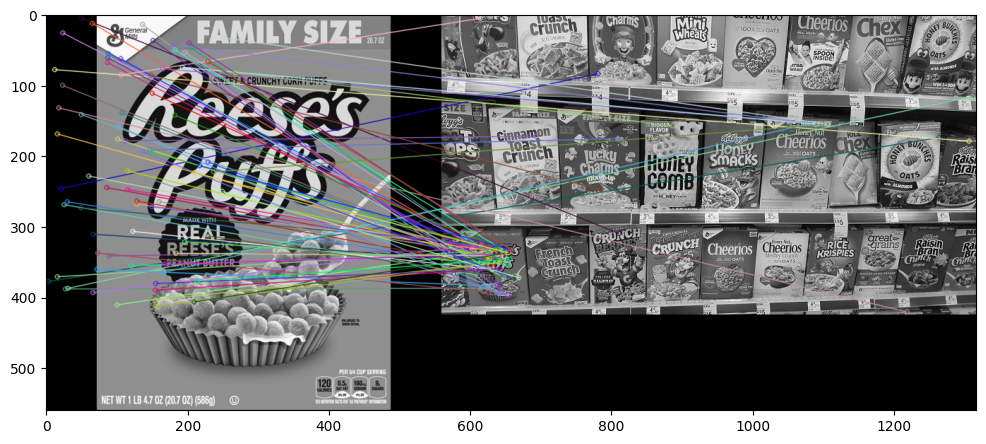

In [21]:
sift_matches = cv.drawMatchesKnn(reeses,kp2,cereals,kp2,good,None,flags=2)
display(sift_matches)

## contoh 3

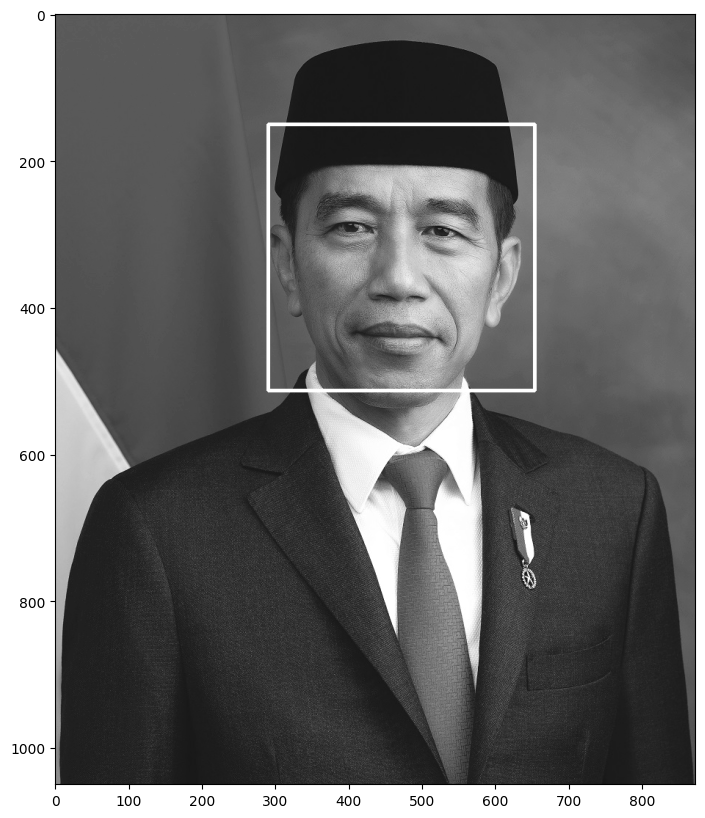

In [23]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')


jokowi = cv.imread('/content/drive/MyDrive/PCVK/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

### TUGAS PRAKTIKUM

# 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

## Lakukan **Face Detection** untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.:

<Figure size 1000x1000 with 0 Axes>

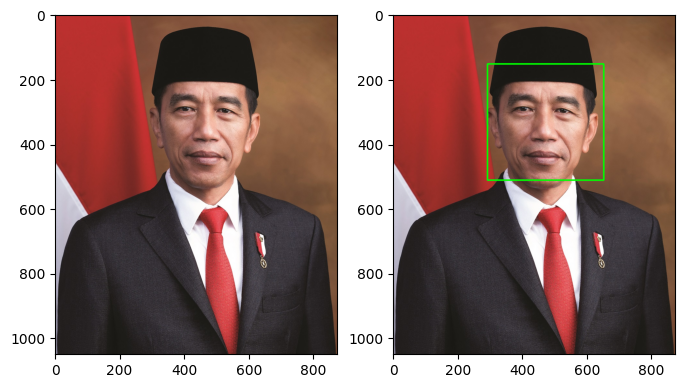

<Figure size 1000x1000 with 0 Axes>

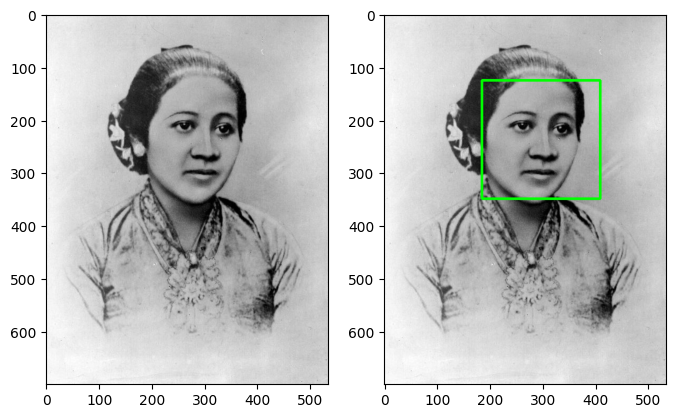

<Figure size 1000x1000 with 0 Axes>

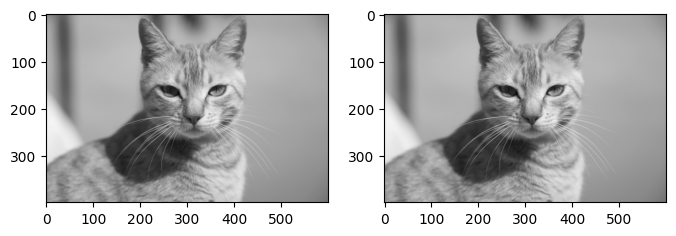

<Figure size 1000x1000 with 0 Axes>

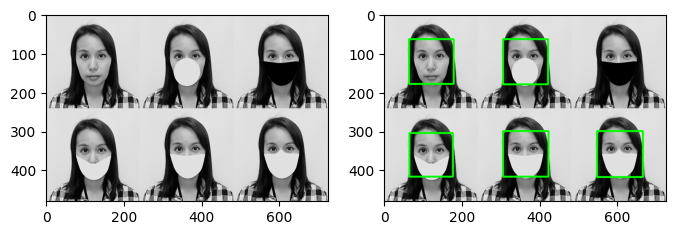

<Figure size 1000x1000 with 0 Axes>

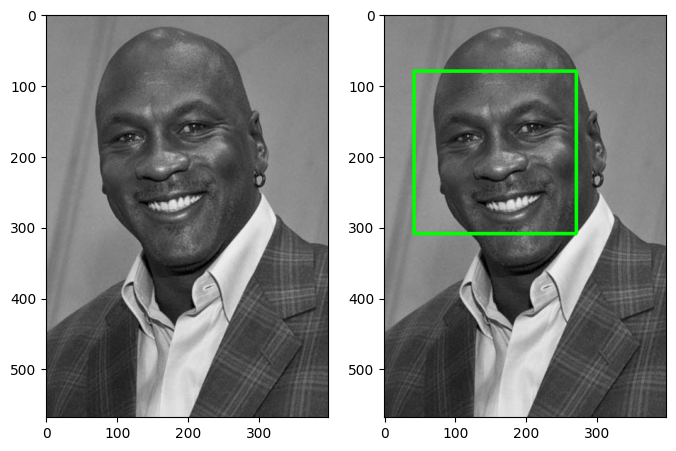

<Figure size 1000x1000 with 0 Axes>

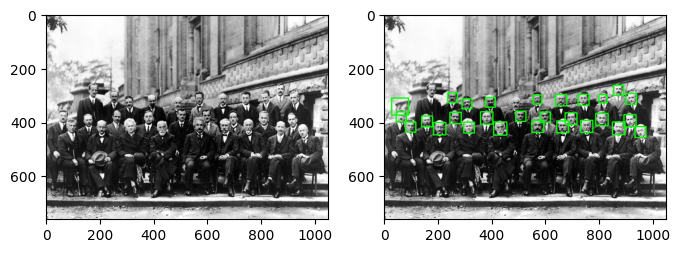

In [24]:
cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

# JOKOWI

jokowi = cv.imread('/content/drive/MyDrive/PCVK/jokowi.jpg')
jokowi_rgb = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi2 = jokowi_rgb.copy()

roi_jokowi = cascade.detectMultiScale(jokowi2)
for(x,y,w,h) in roi_jokowi:
  cv.rectangle(jokowi2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(jokowi_rgb)
plt.subplot(122),plt.imshow(jokowi2)
plt.show()

# KARTINI

kartini = cv.imread('/content/drive/MyDrive/PCVK/kartini.jpg',0)
kartini_rgb = cv.cvtColor(kartini, cv.COLOR_BGR2RGB)
kartini2 = kartini_rgb.copy()

roi_kartini = cascade.detectMultiScale(kartini2)
for(x,y,w,h) in roi_kartini:
  cv.rectangle(kartini2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kartini_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kartini2,cmap='gray')
plt.show()

# KUCING

kucing = cv.imread('/content/drive/MyDrive/PCVK/mycat.jpg',0)
kucing_rgb = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
kucing2 = kucing_rgb.copy()

roi_kucing = cascade.detectMultiScale(kucing2)
for(x,y,w,h) in roi_kucing:
  cv.rectangle(kucing2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kucing_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kucing2,cmap='gray')
plt.show()

# MASKER

mask = cv.imread('/content/drive/MyDrive/PCVK/mask.png',0)
mask_rgb = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
mask2 = mask_rgb.copy()

roi_mask = cascade.detectMultiScale(mask2)
for(x,y,w,h) in roi_mask:
  cv.rectangle(mask2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mask_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mask2,cmap='gray')
plt.show()

# MICHAEL JORDAN

mjordan = cv.imread('/content/drive/MyDrive/PCVK/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
mjordan2 = mjordan_rgb.copy()

roi_mjordan = cascade.detectMultiScale(mjordan2)
for(x,y,w,h) in roi_mjordan:
  cv.rectangle(mjordan2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mjordan_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mjordan2,cmap='gray')
plt.show()

# SOLVAY

solvayconf = cv.imread('/content/drive/MyDrive/PCVK/solvayconf.jpg',0)
solvayconf_rgb = cv.cvtColor(solvayconf, cv.COLOR_BGR2RGB)
solvayconf2 = solvayconf_rgb.copy()

roi_solvayconf = cascade.detectMultiScale(solvayconf2)
for(x,y,w,h) in roi_solvayconf:
  cv.rectangle(solvayconf2, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(solvayconf_rgb,cmap='gray')
plt.subplot(122),plt.imshow(solvayconf2,cmap='gray')
plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).


# 3. Pada Soal No 2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

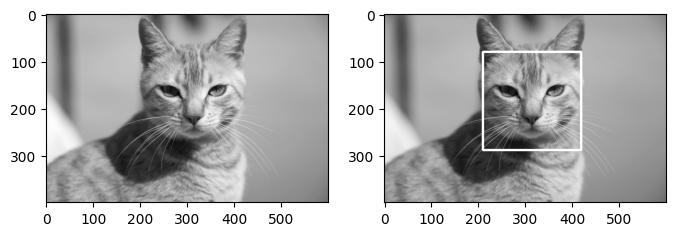

In [25]:
cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface.xml')

kucing3 = cv.imread('/content/drive/MyDrive/PCVK/mycat.jpg',0)
kucing4 = kucing3.copy()

roi_cat = cascade.detectMultiScale(kucing4)
for (x,y,w,h) in roi_cat:
  cv.rectangle(kucing4,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kucing3, cmap='gray')
plt.subplot(122),plt.imshow(kucing4, cmap='gray')
plt.show()

# 4. Cobakan juga untuk **eyes detection**.

<Figure size 1000x1000 with 0 Axes>

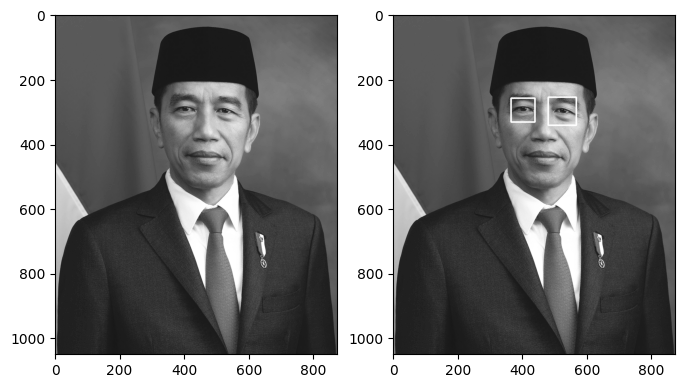

In [26]:
cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_eye.xml')

jokowi3 = cv.imread('/content/drive/MyDrive/PCVK/jokowi.jpg',0)
jokowi4 = jokowi3.copy()

roi_jokowi = cascade.detectMultiScale(jokowi4)
for (x,y,w,h) in roi_jokowi:
  cv.rectangle(jokowi4,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(jokowi3, cmap='gray')
plt.subplot(122),plt.imshow(jokowi4, cmap='gray')
plt.show()

# 5. **Lakukan Face Tracking** menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [39]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')


In [40]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js #untuk mengevaluasi kode JavaScript
from base64 import b64decode # untuk mendecode data dalam format base64.
import numpy as np

In [41]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

In [42]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


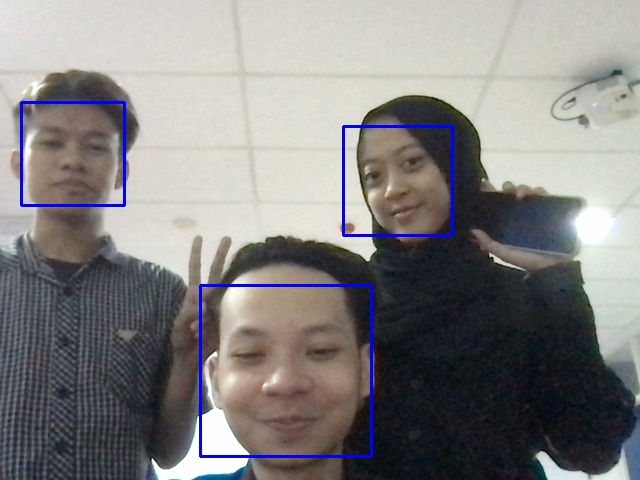

In [44]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

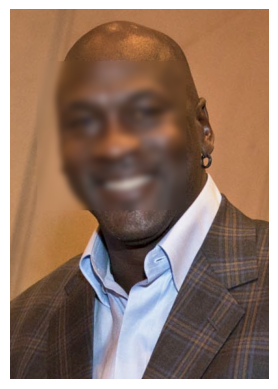

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def blur_faces(image_path):
    # Load pre-trained face detection model
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Blur faces
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.GaussianBlur(face, (99, 99), 5)  # Adjust the kernel size for stronger or weaker blurring
        image[y:y+face.shape[0], x:x+face.shape[1]] = face

    # Display the result
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/PCVK/mjordan.jpg'
blur_faces(image_path)